## global mean plots for 0-Semtner and Winton runs on VSC4

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import path
import sys, importlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

sys.path.append("../../python_packages")
import ICON_tools
importlib.reload(ICON_tools)

xr.set_options(display_style="text")

In [2]:
data_path="/jetfs/scratch/jhoerner/postprocessing"
explist_W, nexp_W = ICON_tools.get_explist(data_path, ["ape_ia_7000_56_3W", "ape_ia_8000_90_3W", "ape_ia_8500_90_3W", "ape_ia_9000_90_3W", "ape_ia_10000_41_3W", "ape_ia_15000_17_3W"])
explist_S, nexp_S = ICON_tools.get_explist(data_path, ["ape_ia_5000_13_0S", "ape_ia_5500_90_0S", "ape_ia_6000_90_0S", "ape_ia_6000_90_0S_cltlim_dtime10", "ape_ia_6500_90_0S_cltlim_dtime10", "ape_ia_8000_13_0S", "ape_ia_9000_13_0S", "ape_ia_10000_13_0S" ]) # , "ape_ia_6500_90_0S" , "ape_ia_7000_62_0S"


DSlistgm_W_decode=np.empty([nexp_W],dtype="object")
DSlistgm_W=np.empty([nexp_W],dtype="object")
DSlistgmzm_W=np.empty([nexp_W],dtype="object")
DSlistgmym_W=np.empty([nexp_W],dtype="object")

DSlistgm_W, DSlistgmzm_W =ICON_tools.load_ds_2d(data_path,explist_W)

DSlistgm_S_decode=np.empty([nexp_S],dtype="object")
DSlistgm_S=np.empty([nexp_S],dtype="object")
DSlistgm_S=np.empty([nexp_S],dtype="object")
DSlistgmym_S=np.empty([nexp_S],dtype="object")

DSlistgm_S,DSlistgmzm_S =ICON_tools.load_ds_2d(data_path,explist_S)

# load the data again with decoded times, as decoding afterwards doesn't seem to work...
DSlistgm_W_decode, _=ICON_tools.load_ds_2d(data_path,explist_W, True)
DSlistgm_S_decode, _=ICON_tools.load_ds_2d(data_path,explist_S, True)


for i in range(nexp_W):
    #fillna 
    DSlistgmzm_W[i] = DSlistgmzm_W[i].where(DSlistgm_W[i]['sic'] < 1e36)
    DSlistgm_W[i] = DSlistgm_W[i].where(DSlistgm_W[i]['sic'] < 1e36)  
    DSlistgm_W_decode[i] = DSlistgm_W_decode[i].where(DSlistgm_W_decode[i]['sic'] < 1e36)


    print(explist_W[i] +" yearly mean")
    DSlistgmym_W[i]=xr.decode_cf(DSlistgm_W_decode[i]).groupby('time.year').mean(dim='time')

for i in range(nexp_S):
    #fillna 
    DSlistgmzm_S[i] = DSlistgmzm_S[i].where(DSlistgm_S[i]['sic'] < 1e36)  
    DSlistgm_S[i] = DSlistgm_S[i].where(DSlistgm_S[i]['sic'] < 1e36)  
    DSlistgm_S_decode[i] = DSlistgm_S_decode[i].where(DSlistgm_S_decode[i]['sic'] < 1e36)  

    print(explist_S[i] +" yearly mean")
    DSlistgmym_S[i]=xr.decode_cf(DSlistgm_S_decode[i]).groupby('time.year').mean(dim='time')


colorlist=["C1","C0","C2","C3","C5","C6","C7"]
linestylelist=["-","--",":"]


ape_ia_7000_56_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_7000_56_3W
ape_ia_8000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8000_90_3W
ape_ia_8500_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8500_90_3W
ape_ia_9000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_9000_90_3W
ape_ia_10000_41_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_10000_41_3W
ape_ia_15000_17_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_15000_17_3W
ape_ia_5000_13_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5000_13_0S
ape_ia_5500_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5500_90_0S
ape_ia_6000_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S
ape_ia_6000_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S_cltlim_dtime10
ape_ia_6500_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postp

[1. 1. 1.]
[0.91403604 1.         1.        ]
[0. 0. 0.]
[0. 0. 0.]
[0.8912825 0.9884613 1.       ]
[1. 1. 1.]


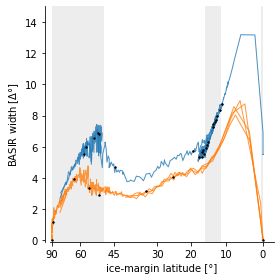

In [6]:
fig, ax = plt.subplots(figsize=(4,4))

alpha=0.8
xfac= 1
omitlast=True


# init arrays for spline interpolation
xnew=np.arange(0,1,step=0.01)
yarray_S = np.empty([nexp_S,np.size(xnew)])
yarray_W = np.empty([nexp_W,np.size(xnew)])



if omitlast:
    lastind=-1
j=0
explist=explist_W
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x = xfac*(DSlistgmym_W[i]["sic"].squeeze())
    y = ICON_tools.sictoicelat(DSlistgmym_W[i]["snowfrac"].squeeze()) - ICON_tools.sictoicelat(DSlistgmym_W[i]["sic"].squeeze())
    print(x[-3:].values)
    l2, = ax.plot(x, y, color=color, ls=linestylelist[0],  lw=1, label=exp,alpha=alpha)
    yarray_W[i,:] = ICON_tools.calc_spline(x, y, xnew=xnew, smoothing = 1)
    ind = ((DSlistgmym_W[i].year-DSlistgmym_W[i].year[0]+1).values % 50 ==0)    
    ax.scatter(x[ind], y[ind],marker= ".", color="black",zorder=100, lw=1, s=8)

j=1
explist=explist_S
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x = xfac*(DSlistgmym_S[i]["sic"].squeeze()[:lastind])
    y = ICON_tools.sictoicelat(DSlistgmym_S[i]["snowfrac"].squeeze()[:lastind]) - ICON_tools.sictoicelat(DSlistgmym_S[i]["sic"].squeeze()[:lastind])
    l2, = ax.plot(x, y, color=color, ls=linestylelist[0],  lw=1, label=exp,alpha=alpha)
    yarray_S[i,:] = ICON_tools.calc_spline(x, y, xnew=xnew, smoothing = 1)

    ind = ((DSlistgmym_S[i].year-DSlistgmym_S[i].year[0]+1)[:lastind].values % 50 ==0)    
    ax.scatter(x[ind], y[ind],marker= ".", color="black",zorder=100, lw=1, s=8)



ax.axvspan(0,ICON_tools.icelatosic(49), color='lightgray', alpha=0.4, lw=0)
ax.axvspan(ICON_tools.icelatosic(16), ICON_tools.icelatosic(11.5), color='lightgray', alpha=0.4, lw=0)
ax.axvspan(0.99, 1, color='lightgray', alpha=0.4, lw=0)


#ax.set_xlabel("ice covered area [km$^2$]")
ax.set_ylabel("BASIR width [$\Delta$°]")
#ax.set_xlim(xfac*-0.01,xfac*1.05)
ax.set_ylim(-0.1,15)

ax.set_xlim(xfac*-0.01,xfac*1.05)
ax.set_xlabel("ice-margin latitude [°]")

xticks=[90,60,45,30,20,10,0]
ax.set_xticks(xfac*(ICON_tools.icelatosic(xticks)))
ax.set_xticklabels(xticks)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.spines['left'].set_position(('outward',5))


plt.tight_layout()
plt.savefig("plots/Fig2-bareicefrac.pdf")